*Created in Google Colab*

# Applied Machine Learning - ELG5255 [EG] - 2021 Summer 
# Assignment #2 - Parametric Methods

---


Abdelrahman Mohamed Abdelhakim Othman, aothm031@uOttawa.ca </br>
Aliaa Zaki Moawad Ali Ahmed, aahme256@uottawa.ca</br>
Heba Sherif Mahmoud Hassan, hhass021@uOttawa.ca</br>


---

## Goal
This assignment aims to understand Naïve Bayes Classification and how the mean and the variance values affect posterior probabilities.

---



# Part 1

Given the training data, predict the class for the following example 
>Sepal length=6.9, Sepal width=3.1, Petal length=5.4, Petal width=2.1

using Naïve Bayes Classification such that 
> Species: 'Setosa' : 0, 'Versicolor' : 1, 'Virginica' : 2

In [1]:
import pandas as pd

iris = {'sepal_length_cm': [4.6,4.9,5.4,5.7,4.8,6.3,6.4,5.9,6.7,5.9,4.9,5.8,6.9,6.4,6.4],
        'sepal_width_cm':  [3.4,3.0,3.4,4.4,3.4,3.3,3.2,3.2,3.1,3.0,2.5,2.7,3.2,3.2,2.7],
        'petal_length_cm': [1.4,1.4,1.7,1.5,1.6,4.7,4.5,4.8,4.4,4.2,4.5,5.1,5.7,5.3,5.3],
        'petal_width_cm':  [0.3,0.2,0.2,0.4,0.2,1.6,1.5,1.8,1.4,1.5,1.7,1.9,2.3,2.3,1.9],
        'Species':         [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]
        }
df = pd.DataFrame(iris, columns = ['sepal_length_cm', 'sepal_width_cm' , 'petal_length_cm' , 'petal_width_cm' , 'Species'])
print (df)

    sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  Species
0               4.6             3.4              1.4             0.3        0
1               4.9             3.0              1.4             0.2        0
2               5.4             3.4              1.7             0.2        0
3               5.7             4.4              1.5             0.4        0
4               4.8             3.4              1.6             0.2        0
5               6.3             3.3              4.7             1.6        1
6               6.4             3.2              4.5             1.5        1
7               5.9             3.2              4.8             1.8        1
8               6.7             3.1              4.4             1.4        1
9               5.9             3.0              4.2             1.5        1
10              4.9             2.5              4.5             1.7        2
11              5.8             2.7              5.1            

(Species: 'Setosa' : 0, 'Versicolor' : 1, 'Virginica' : 2

In [2]:
features=list(zip(df['sepal_length_cm'], df['sepal_width_cm'] , df['petal_length_cm'] , df['petal_width_cm'] ))
print (features)

[(4.6, 3.4, 1.4, 0.3), (4.9, 3.0, 1.4, 0.2), (5.4, 3.4, 1.7, 0.2), (5.7, 4.4, 1.5, 0.4), (4.8, 3.4, 1.6, 0.2), (6.3, 3.3, 4.7, 1.6), (6.4, 3.2, 4.5, 1.5), (5.9, 3.2, 4.8, 1.8), (6.7, 3.1, 4.4, 1.4), (5.9, 3.0, 4.2, 1.5), (4.9, 2.5, 4.5, 1.7), (5.8, 2.7, 5.1, 1.9), (6.9, 3.2, 5.7, 2.3), (6.4, 3.2, 5.3, 2.3), (6.4, 2.7, 5.3, 1.9)]


In [3]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()
# Train the model using the training sets
model.fit(features,df['Species'])
#Predict Output
predicted= model.predict([[6.9, 3.1 , 5.4, 2.1]]) 
print ("Predicted Value:", predicted)

Predicted Value: [2]


Predicted Class: 'Virginica' [2]



---



# Part2

In [4]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.naive_bayes import GaussianNB

## 1. Load the Iris dataset

In [5]:
iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['Species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## 2. Drop the petal length and petal width features to form a 2D Iris dataset

In [6]:
X = df.iloc[:,:2]
y = df['Species']

In [7]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


## 3. Plotting & Naive Bayes
- Plot the likelihoods of first feature (Sepal length) for each class as given below
- Apply Naïve Bayes Classifier to 2D Iris dataset to predict classes
- Plot posterior probabilities and calculate the accuracy

In [8]:
## plot data
def plot_likelihood(means,stds):
  x=np.linspace(2,10,100)

  ## y-axis as the gaussian
  y1_data = stats.norm.pdf(x, means[0], stds[0])
  y2_data = stats.norm.pdf(x, means[1], stds[1])
  y3_data = stats.norm.pdf(x, means[2], stds[2])

  plt.figure(figsize=(10, 8))
  plt.plot(x, y1_data,label='Setosa')
  plt.plot(x, y2_data,label='Versicolor')
  plt.plot(x, y3_data,label='Virginica')

  plt.xlabel('Sepal length',fontsize=15)
  plt.ylabel('Likelihood',fontsize=15)
  plt.legend(fontsize=15)

  plt.show()

In [9]:
def plot_posterior(clf):
  x=np.linspace(2,10,150)
  ## plot data
  plt.figure(figsize=(10, 8))
  plt.plot(x, clf.predict_proba(X)[:,0],label='Setosa')
  plt.plot(x, clf.predict_proba(X)[:,1],label='Versicolor')
  plt.plot(x, clf.predict_proba(X)[:,2],label='Virginica')


  plt.xlabel('Sepal length',fontsize=15)
  plt.ylabel('Posterior',fontsize=15)
  plt.legend(fontsize=15)

  plt.show()

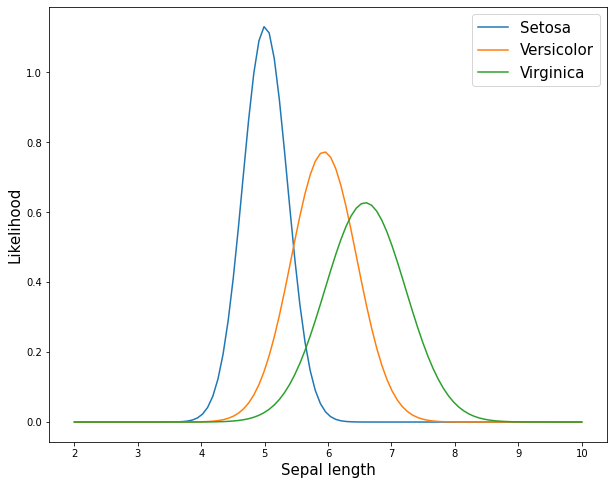

In [10]:
from scipy import stats


#Select sepal length for every class
lh_c1 = df.loc[df['Species']==0, 'sepal length (cm)'].sort_values()
lh_c2 = df.loc[df['Species']==1, 'sepal length (cm)'].sort_values()
lh_c3 = df.loc[df['Species']==2, 'sepal length (cm)'].sort_values()

#Calculate Mean
c1_mean = lh_c1.mean()
c2_mean = lh_c2.mean()
c3_mean = lh_c3.mean()

#Calculate Standard deviation.
c1_sd = lh_c1.std()
c2_sd = lh_c2.std()
c3_sd = lh_c3.std()


plot_likelihood([c1_mean,c2_mean,c3_mean],[c1_sd,c2_sd,c3_sd])

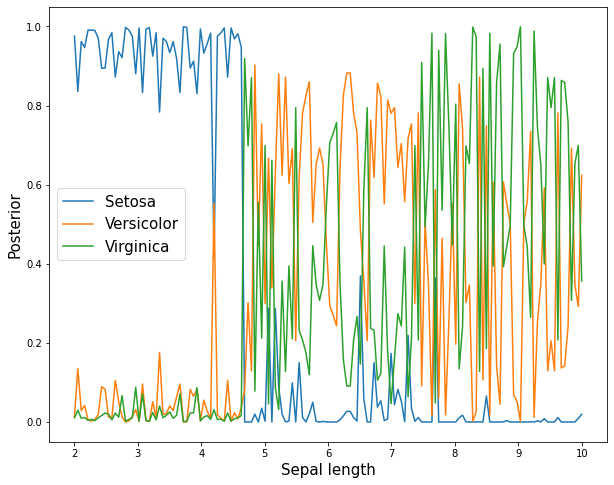

In [11]:
clf = GaussianNB()
clf.fit(X, y)
plot_posterior(clf)

In [12]:
clf.score(X, y)

0.78

## 4. Changing the Mean & the Variance

### Case 1
- Mean1 = Mean2 = Mean3 = 5.5
- plot the likelihoods of the first feature (Sepal length)
- apply NB classifier
- plot posterior probabilities
- calculate accuracy

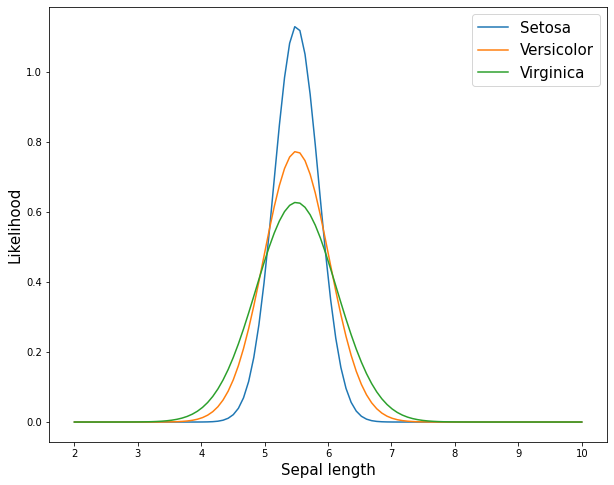

In [13]:
plot_likelihood([5.5,5.5,5.5],[c1_sd,c2_sd,c3_sd])

In [14]:
clf = GaussianNB()
clf.fit(X, y)
clf.theta_[:, 0] = 5.5

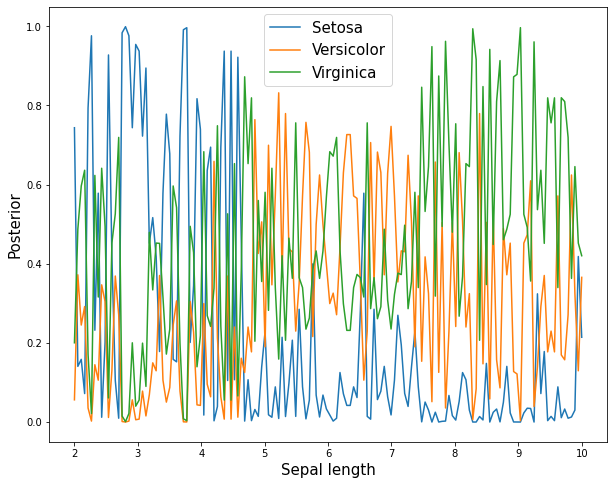

In [15]:
plot_posterior(clf)

In [16]:
clf.score(X, y)

0.6266666666666667

### Case 2

- Var1 = Var2 = Var3 = 0.26
- plot the likelihoods of the first feature (Sepal length)
- apply NB classifier
- plot posterior probabilities
- calculate accuracy

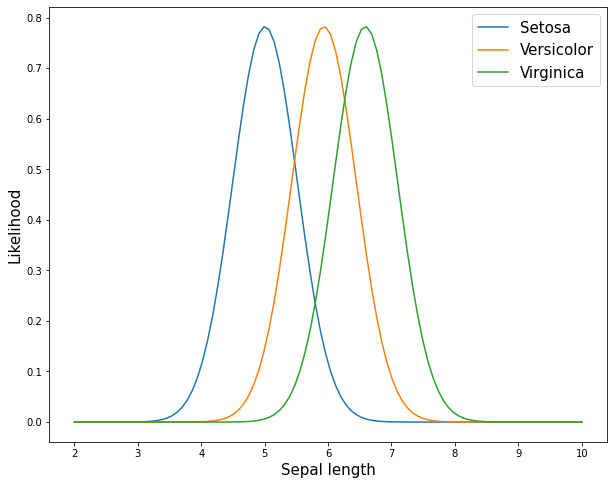

In [17]:
new_std = np.sqrt(0.26)
plot_likelihood([c1_mean,c2_mean,c3_mean],[new_std,new_std,new_std])

In [18]:
clf = GaussianNB()
clf.fit(X, y)
clf.sigma_[:, 0] = 0.26

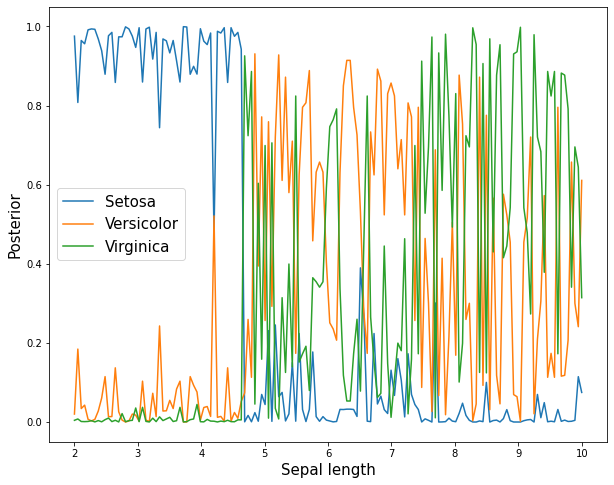

In [19]:
plot_posterior(clf)

In [20]:
clf.score(X, y)

0.8

### Comments on the results obtained from the two cases

- The highest accuracy is achieved from the last model, where the variance was changed to 0.26
- Changing the mean, shifts the curve right or left but doesn’t change its shape, while changing the variance, changes the curve's width and height in order to maintain an area under the curve equivalent to 1. 
